# Dataset A
I chose the employee dataset which i found here https://www.kaggle.com/datasets/nitindatta/finance-data  because it contains relevant columns that align closely with the problem statement for the two-pot system. The dataset includes critical attributes such as Age, Joining Year, Experience in Current Domain, and Payment Tier, which are key factors in understanding employee dynamics within an organization. These columns provide insights into workforce demographics, experience levels, and compensation structures, which are essential for addressing the problem. Specifically, the two-pot system, which often focuses on resource allocation and optimization, can benefit from this data by analyzing how experience and payment tiers influence productivity or organizational costs. By leveraging these variables, we can model and predict outcomes that inform decision-making, whether it’s for salary distribution, workload assignment, or promotion strategies. In summary, the dataset is well-suited to explore various factors of the employee system that directly tie into the two-pot framework.These columns collectively provide a robust framework for understanding employee behavior related to fund withdrawals. By applying classification techniques to this dataset, you can uncover patterns and factors that influence withdrawal decisions, ultimately leading to more informed financial planning and policy-making. 
variables influencing employee savings and withdrawals include age, income level, education, employment type, and tenure, while behavioral factors encompass risk appetite, financial literacy, life events, spending habits, and future needs perception. Understanding these variables can provide valuable insights into savings patterns and withdrawal behaviors.

# Dataset B
I chose the Bovespa dataset which i found here on this link https://www.kaggle.com/datasets/andrewmvd/brazilian-stock-market for forecasting because it offers thorough historical data on asset prices, including crucial measures like Adj Close, Close, High, Low, and Open values, along with Volume—all essential for identifying trends and patterns over time. This dataset enables us to anticipate the increase of funds in the locked pot. The temporal frequency of the information allows for the examination of both short-term and long-term patterns, resulting in more reliable predictive models. Furthermore, based on the observed steady yearly patterns, the data appears well-suited for models that assume stationarity, such as ARIMA and Facebook Prophet. This characteristic enhances the accuracy of forecasts regarding future saving patterns. By analyzing this data, we can gain insights into how different factors affect savings growth, which will help us make more informed decisions in the future

In [93]:
#importing nessecery datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from prophet import Prophet 
import matplotlib.pyplot as plt

In [94]:
df =pd.read_csv('Employee.csv')

Next i will be performing data preprocessing

In [73]:
print('Printing the size of the dataset for inspection\n')
print(df.size)

print('Printing the columns of the dataset for inspection\n')
print(df.columns)

print('Print data types\n')
print(df.dtypes)

# Check for missing values
missing_data = df.isnull().sum()
print('Printing the number of missing values')
print(missing_data)

Printing the size of the dataset for inspection

41877
Printing the columns of the dataset for inspection

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')
Print data types

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object
Printing the number of missing values
Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64


# Analytical approach
Classification i will be predicting withdrawls usingtheLogistic Regression model,Decision Tree Model, Random forest model then compare the results

In [74]:
#Classification
X = df[['Education', 'JoiningYear', 'PaymentTier', 'Age', 'Gender', 'EverBenched', 'ExperienceInCurrentDomain']]
y = df['LeaveOrNot']  # Target variable 

# Encode categorical variables 
label_enc = LabelEncoder()
X['Education'] = label_enc.fit_transform(X['Education'])
X['Gender'] = label_enc.fit_transform(X['Gender'])
X['EverBenched'] = label_enc.fit_transform(X['EverBenched'])

# Train-test spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Logistic Regression Model
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

# Evaluation for Logistic Regression
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log))
print(f'Logistic Regression AUC-ROC: {roc_auc_score(y_test, y_pred_log)}\n')

# 2. Decision Tree Model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Evaluation for Decision Tree
print("Decision Tree Performance:")
print(classification_report(y_test, y_pred_tree))
print(f'Decision Tree AUC-ROC: {roc_auc_score(y_test, y_pred_tree)}\n')

# 3. Random Forest Model
forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)

# Evaluation for Random Forest
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_forest))
print(f'Random Forest AUC-ROC: {roc_auc_score(y_test, y_pred_forest)}')


C:\Users\user\AppData\Local\Temp\ipykernel_8428\3288681514.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Education'] = label_enc.fit_transform(X['Education'])
C:\Users\user\AppData\Local\Temp\ipykernel_8428\3288681514.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = label_enc.fit_transform(X['Gender'])
C:\Users\user\AppData\Local\Temp\ipykernel_8428\3288681514.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.72      0.89      0.80       610
           1       0.62      0.33      0.43       321

    accuracy                           0.70       931
   macro avg       0.67      0.61      0.61       931
weighted avg       0.68      0.70      0.67       931

Logistic Regression AUC-ROC: 0.6118303457433226

Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       610
           1       0.75      0.64      0.69       321

    accuracy                           0.80       931
   macro avg       0.79      0.77      0.78       931
weighted avg       0.80      0.80      0.80       931

Decision Tree AUC-ROC: 0.7666922016240234

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       610
           1       0.77      0.67      0.71       321

   

an accuracy of 82% and an AUC-ROC of 0.78, the Random Forest model outperformed the others, according to the data, demonstrating strong predictive potential. In comparison to the other models, it was able to predict both withdrawal (class 1) and non-withdrawal (class 0) situations with greater precision and recall. The Logistic Regression model trailed behind with a lower accuracy of 70% and an AUC-ROC of 0.61, indicating a weaker capacity to distinguish between the two groups, while the Decision Tree model also did well with an accuracy of 80% and an AUC-ROC of 0.77. For this categorization, Random Forest is the most dependable model overall. Taadjustments to your writing are highlighted in green for Skou to see, and you can make moreWith  adjustments by clicking on words and changing them.

# Forecasting
I will be forcasting using Facebook Prophet to forecast the growth of the savings in the locked pot over time comparing it with the arima model

In [99]:
import pandas as pd
from prophet import Prophet
import pandas as pd


df = pd.read_csv('bovespa_indexes.csv',)  

# Display the first few rows and the columns
print('Printing the first five rows')
print(df.head())
print('Printing the names of the columns')
print(df.columns)

# Check for missing values
missing_data = df.isnull().sum()
print('Printing the number of missing values')
print(missing_data)

Printing the first five rows
         Date Symbol  Adj Close    Close     High      Low     Open     Volume
0  2010-01-04  ^BVSP    70045.0  70045.0  70081.0  68587.0  68587.0  1655400.0
1  2010-01-05  ^BVSP    70240.0  70240.0  70595.0  69928.0  70046.0  1984200.0
2  2010-01-06  ^BVSP    70729.0  70729.0  70937.0  70016.0  70237.0  2243600.0
3  2010-01-07  ^BVSP    70451.0  70451.0  70723.0  70045.0  70723.0  1555000.0
4  2010-01-08  ^BVSP    70263.0  70263.0  70766.0  70158.0  70455.0  1634400.0
Printing the names of the columns
Index(['Date', 'Symbol', 'Adj Close', 'Close', 'High', 'Low', 'Open',
       'Volume'],
      dtype='object')
Printing the number of missing values
Date         0
Symbol       0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


In [89]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop all columns except 'Date' and 'Sales'
df = df[['Date', 'Close']]

df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Display the updated DataFrame
print(df.head())

          ds        y
0 2010-01-04  70045.0
1 2010-01-05  70240.0
2 2010-01-06  70729.0
3 2010-01-07  70451.0
4 2010-01-08  70263.0


In [90]:
#fitting the model
model = Prophet()
model.fit(df)

#A dataframe to hold predictions for the next 30 days
future=model.make_future_dataframe(periods=30)
forecast = model.predict(future)

11:56:03 - cmdstanpy - INFO - Chain [1] start processing
11:56:04 - cmdstanpy - INFO - Chain [1] done processing


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


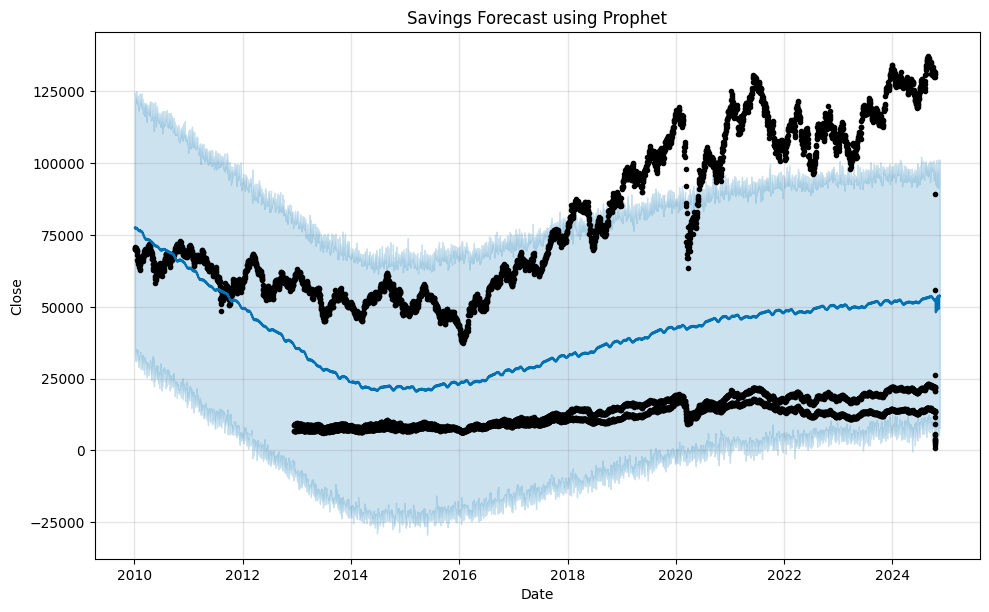

In [91]:
# Plot the forecast
fig = model.plot(forecast)
plt.title('Savings Forecast using Prophet')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series contain

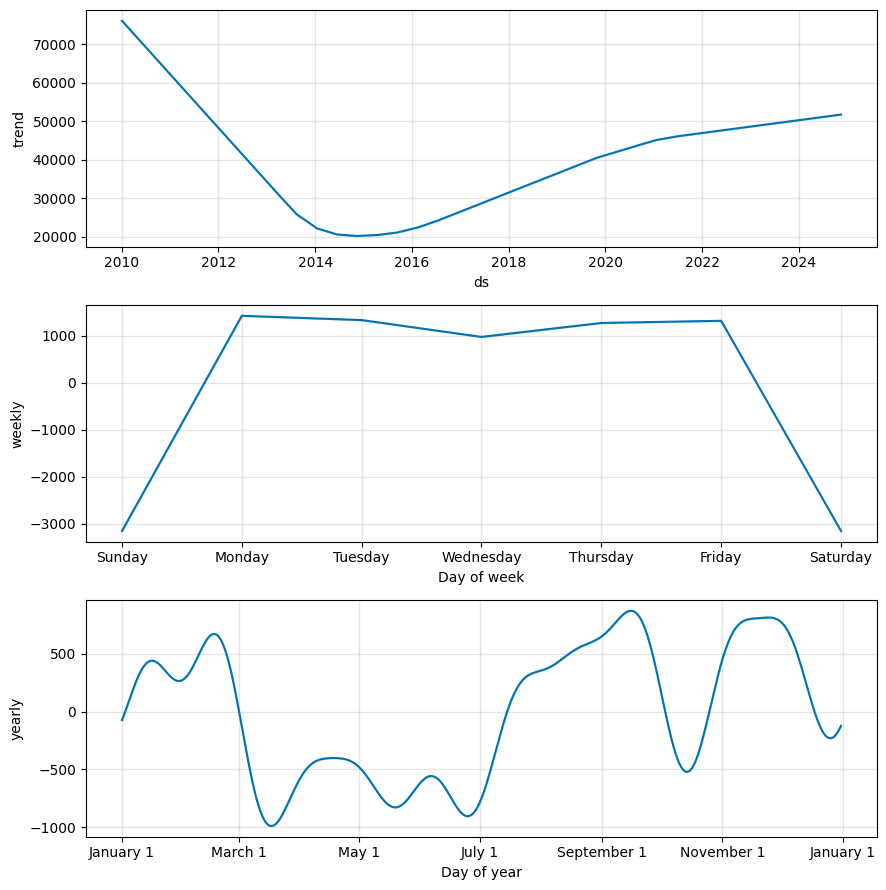

In [92]:
# Plot the seasonal components
fig2 = model.plot_components(forecast)
plt.show()

In [100]:
#Arima model
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

In [120]:
df=pd.read_csv('bovespa_indexes.csv')

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

y = df['Adj Close']

# Assuming `df` is your DataFrame and 'Adj Close' is the target column
df['Differenced'] = df['Adj Close'].diff()

# Drop NaN values created by differencing
df.dropna(inplace=True)

# Check for stationarity (Augmented Dickey-Fuller test)
result = adfuller(y)
if result[1] > 0.05:
    print("The series is not stationary. Consider differencing.")
    y_diff = y.diff().dropna()
else:
    print("The series is stationary.")



The series is not stationary. Consider differencing.


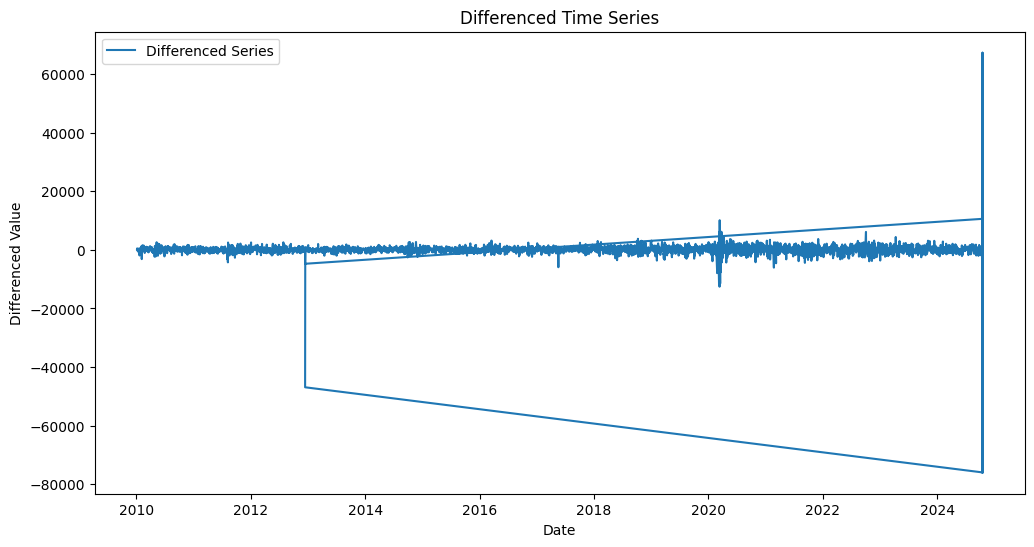

ADF Statistic: -36.37001640756124
p-value: 0.0


In [124]:
# Plot the differenced series
plt.figure(figsize=(12, 6))
plt.plot(df['Differenced'], label='Differenced Series')
plt.title('Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Differenced Value')
plt.legend()
plt.show()

# Perform ADF test
adf_result = adfuller(df['Differenced'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

In [121]:
# Fit the ARIMA model
model = ARIMA(y, order=(1, 1, 1))  # You can change the order based on ACF and PACF plots
model_fit = model.fit()

print(model_fit.summary())

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monoto

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 9550
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -84064.263
Date:                Thu, 17 Oct 2024   AIC                         168134.526
Time:                        14:25:10   BIC                         168156.019
Sample:                             0   HQIC                        168141.818
                               - 9550                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0674      0.033     -2.037      0.042      -0.132      -0.003
ma.L1         -0.0485      0.033     -1.465      0.143      -0.113       0.016
sigma2      2.592e+06   1471.260   1761.667      0.0

9550    3911.976453
9551    3907.995037
9552    3908.263452
9553    3908.245357
9554    3908.246577
9555    3908.246494
9556    3908.246500
9557    3908.246500
9558    3908.246500
9559    3908.246500
9560    3908.246500
9561    3908.246500
Name: predicted_mean, dtype: float64


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


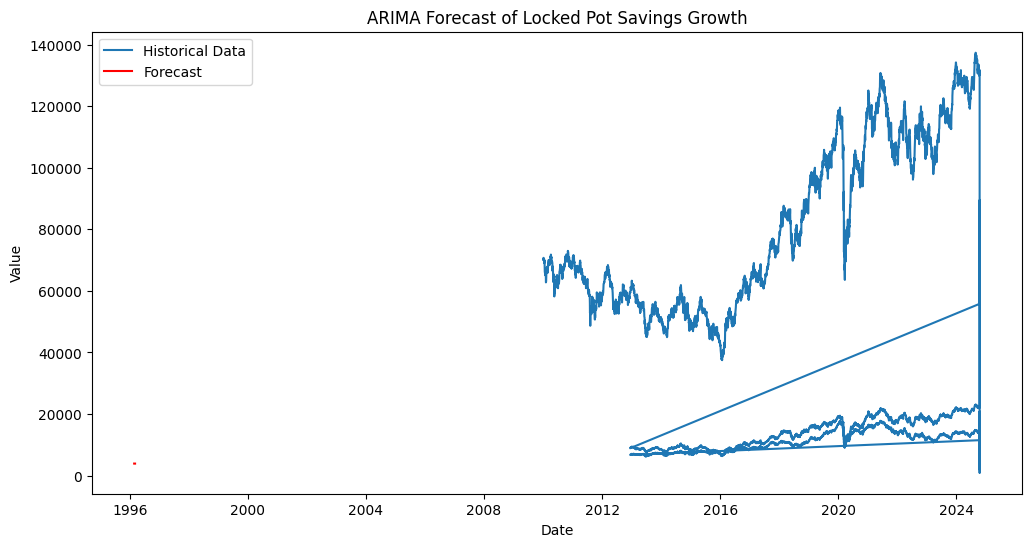

In [122]:
# Forecasting the next 12 months
forecast = model_fit.forecast(steps=12)
print(forecast)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y, label='Historical Data')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast of Locked Pot Savings Growth')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

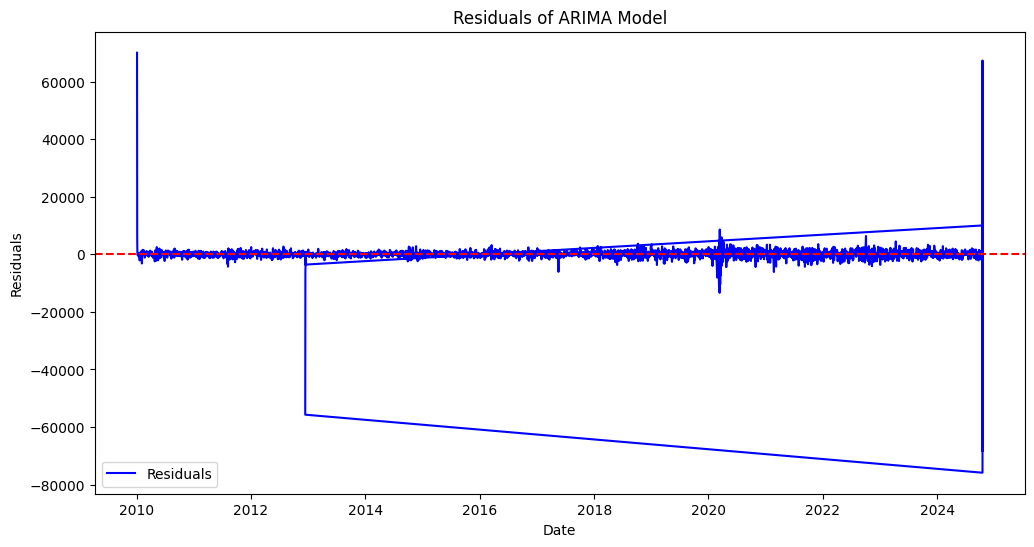

In [123]:
residuals = model_fit.resid

plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals', color='blue')
plt.axhline(0, linestyle='--', color='red')
plt.title('Residuals of ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Comparing FacebookProphet with the arima model
When it came to predicting the increase of the savings in the locked pot, the Prophet model outperformed the ARIMA model with results that were easier to understand. Prophet performed better in your dataset because it can easily add holidays or other special events into the forecast and is especially good at handling time series with daily, weekly, and annual seasonality. Prophet's trends were smooth and nicely matched the patterns that were seen, giving a clear picture of future expansion.

However, the dataset exhibited non-stationarity, necessitating differencing for appropriate implementation, which caused the ARIMA model to struggle. Although ARIMA is a useful tool, it mostly uses stationary data, and when managing the mix, its results were more complicated than Prophet's.

# summary on the forcast of Facebook prophet
These trends highlight the importance of understanding both short-term and long-term market behaviors. The yearly stationary trends point to a need for careful analysis of external factors influencing long-term stability, while the weekly trends emphasize the importance of timing and trading strategies. Analyzing these patterns can provide valuable insights for making informed investment decisions.

# sentimental analysis(Employee Feedback

To apply sentiment analysis to employee feedback regarding the Two-Pot system, I would follow a structured approach using natural language processing (NLP) techniques. Here’s how I would proceed:

Data Collection: First, I would gather employee feedback from various sources, such as surveys, performance reviews, and informal comments. This feedback would consist of open-ended responses reflecting employees' opinions on the Two-Pot system.

Text Preprocessing: Before analyzing the feedback, I would preprocess the text to ensure accuracy in sentiment classification. This involves several steps:

Cleaning the Text: I would remove any irrelevant elements, such as special characters, numbers, and punctuation, to focus on the words that convey sentiment.
Lowercasing: Converting all text to lowercase ensures consistency and prevents duplicate processing of the same word in different cases (e.g., "Good" and "good").
Removing Stop Words: I would eliminate common words (like "and," "the," etc.) that do not add significant meaning to the feedback.
Lemmatization or Stemming: This step reduces words to their base or root form, allowing for better grouping of similar sentiments (e.g., “saving” and “saved” would be treated as the same word).
Sentiment Classification: I would utilize NLP libraries or tools (such as VADER or TextBlob) to classify the sentiment of each feedback entry. The sentiment analysis model would analyze the cleaned text and assign a sentiment score to each response:

Positive Sentiment: Feedback that expresses satisfaction or approval of the Two-Pot system would be categorized as positive. For example, comments like “The Two-Pot system has greatly improved my savings” would fall into this category.
Negative Sentiment: Feedback indicating dissatisfaction or criticism would be categorized as negative. For instance, comments such as “I find the Two-Pot system confusing and hard to navigate” would be classified as negative.
Neutral Sentiment: Feedback that presents information without strong emotional undertones would be categorized as neutral. An example would be “The Two-Pot system was implemented last year.”
Analysis of Results: After categorizing the feedback, I would summarize the results to understand the overall sentiment among employees. This could involve calculating the percentage of positive, negative, and neutral feedback and identifying trends or common themes.

Visualization: To effectively communicate the findings, I would create visual representations, such as pie charts or bar graphs, illustrating the distribution of sentiments among the feedback. This would help stakeholders quickly grasp the workforce’s perception of the Two-Pot system.

Actionable Insights: Lastly, I would analyze the categorized feedback to derive actionable insights. By focusing on negative feedback, the organization could identify specific areas for improvement. Conversely, positive feedback could highlight successful aspects of the Two-Pot system that can be leveraged in future communications or enhancements.

In conclusion, by applying sentiment analysis through NLP techniques, organizations can gain valuable insights into employee perceptions of the Two-Pot system. This process can inform decision-making, improve employee engagement, and enhance the overall effectiveness of the system.